In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("data/MouseBrain_sce.h5ad")

In [4]:
anet.pp.normalize(adata)

In [5]:
print(adata.X[0:10, 0:10])

  (3, 0)	0.19426360329792525
  (6, 0)	0.09472177501057862
  (8, 0)	0.003300493166379891
  (5, 1)	0.0028526684625663932
  (9, 1)	0.00811486255005374
  (3, 5)	0.08475168045168134
  (4, 5)	0.8498425296261223
  (3, 7)	0.029056006129995482
  (4, 7)	1.7248040540782026
  (0, 8)	0.048739462328497005
  (2, 8)	0.05819561193116353
  (3, 8)	0.45674371974454114
  (4, 8)	0.4636560928195409
  (6, 8)	0.5425038398520935
  (1, 9)	1.70360174787663
  (8, 9)	0.28562589429689433


In [6]:
batch = adata.obs["batch"]
batch[0:9]

index
CORTEX1_SMART_SEQ2.M2_EXPT2_1      Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_100    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_101    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_103    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_104    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_106    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_11     Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_110    Cortex1.Smart-seq2
CORTEX1_SMART_SEQ2.M2_EXPT2_111    Cortex1.Smart-seq2
Name: batch, dtype: category
Categories (8, object): ['Cortex1.10x Chromium', 'Cortex1.DroNc-seq', 'Cortex1.sci-RNA-seq', 'Cortex1.Smart-seq2', 'Cortex2.10x Chromium', 'Cortex2.DroNc-seq', 'Cortex2.sci-RNA-seq', 'Cortex2.Smart-seq2']

In [7]:
anet.pp.reduce_and_batch_correct_adata_Harmony(adata, "batch")

Computing reduced ACTION kernel (sparse):
	Performing SVD on original matrix: IRLB (sparse) -- A: 22229 x 11518
Harmony 0/10
Harmony 1/10
Harmony converged after 1 iterations


In [8]:
print(adata.obsm["ACTION"][0:5, 0:5].T)

[[ 3.22184116  1.48700361  3.15988268  2.72617329  2.66421481]
 [ 3.81315213  0.56912718 -7.22791524 -8.99220951  4.21154116]
 [-3.18417682  1.59208841  0.2041139  -0.36740502 -3.26582238]
 [-4.3833672  -4.6158185  -8.73352708 -8.43466114 -4.15091591]
 [ 5.04551092  1.69173013  5.22358778  4.12544717  3.85833188]]


In [9]:
print(adata.obsm["Harmony"][0:5, 0:5].T)

[[ 0.51764229 -0.87485257  0.68923611  0.46881149 -0.09071189]
 [ 3.98214797  1.9217082  -3.45492723 -5.3818075   4.3431438 ]
 [-1.12356627  2.87146292  1.59554893  0.86385045 -1.09090288]
 [-0.94841657 -0.23533191 -3.69585145 -3.57886167 -0.73142582]
 [ 2.42311872 -0.30924331  2.66045457  1.79130454  1.23699806]]


In [10]:
anet.run_ACTIONet(adata)

Running ACTION (10 threads):
	Iterating from k = 2 ... 30: 29/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 4
	Unreliable archetypes: 34
	Trivial archetypes: 2
Unifying 425 archetypes (10 threads):
# unified archetypes: 23
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... done
Laying-out input network: method = umap, a = 0.115, b = 1.929 (epochs = 100, threads=10)
Computing 2D layout ... done
Computing 3D layout ... done
Computing de novo node colors ... done
Computing feature specificity ... done
Building adaptive network (density = 0.50)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... 
		Keeping mutual nearest-neighbors only ... 

In [11]:
adata

AnnData object with n_obs × n_vars = 11518 × 22229
    obs: 'NAME', 'nGene', 'nUMI', 'percent.mito', 'Cluster', 'CellType', 'Experiment', 'Method', 'batch', 'assigned_archetype', 'node_centrality'
    var: 'Symbol', 'Ensemble_Gene_ID'
    uns: 'metadata', 'obsm_annot', 'varm_annot', 'ACTION'
    obsm: 'ACTION', 'ACTION_B', 'Harmony', 'Harmony_normalized', 'C_stacked', 'H_stacked', 'C_unified', 'H_unified', 'archetype_footprint', 'ACTIONred', 'ACTIONet2D', 'ACTIONet3D', 'denovo_color'
    varm: 'ACTION_V', 'ACTION_A', 'unified_feature_profile', 'unified_feature_specificity'
    obsp: 'ACTIONet'

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

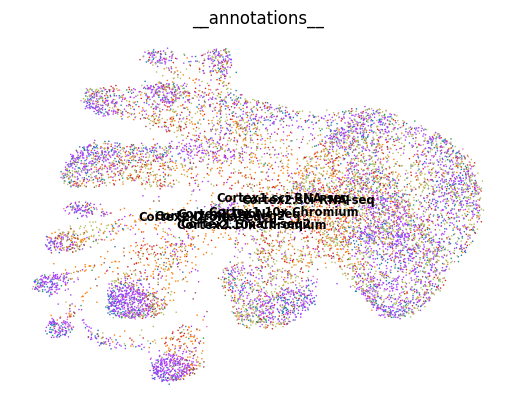

In [12]:
anet.pl.plot_ACTIONet(adata, "batch")

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

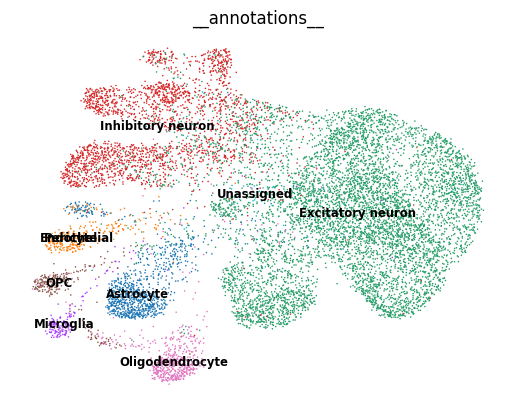

In [13]:
anet.pl.plot_ACTIONet(adata, "CellType")

In [15]:
adata.write_h5ad("data/MouseBrain_ACTIONet_HarmonySPA_python.h5ad")